<a href="https://colab.research.google.com/github/GabrieliPiekas/Treinamento-YOLOv8/blob/main/YOLOv8_Treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8 - Treinamento de modelo customizado



In [ ]:
!nvidia-smi

Sun Oct 13 21:45:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Preparação do dataset

A estrutura necessária é a seguinte

* /dataset
  * /train
  * /val

In [ ]:
!mkdir dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/TreinamentoCustomizadoYOLO/ /TreinamentoCustomizadoYOLO

In [ ]:
!ls /content/gdrive/My\ Drive/TreinamentoCustomizadoYOLO/

cimegripe.jpg	    obj.names  train.txt		   yolov4_custom.cfg
obj_atualizado.rar  obj.zip    valid.zip		   yolov4_custom_last.weights
obj.data	    test.txt   yolov4_custom_best.weights


In [ ]:
ls /TreinamentoCustomizadoYOLO/

cimegripe.jpg       obj.names  train.txt                   yolov4_custom.cfg
obj_atualizado.rar  obj.zip    valid.zip                   yolov4_custom_last.weights
obj.data            test.txt   yolov4_custom_best.weights


### Copiando o conjunto de imagens de treinamento

In [ ]:
!unzip /TreinamentoCustomizadoYOLO/obj.zip -d dataset/

Archive:  /TreinamentoCustomizadoYOLO/obj.zip
  inflating: dataset/obj/amoxilina_1099.jpg  
  inflating: dataset/obj/amoxilina_1099.txt  
  inflating: dataset/obj/amoxilina_1100.jpg  
  inflating: dataset/obj/amoxilina_1100.txt  
  inflating: dataset/obj/amoxilina_1101.jpg  
  inflating: dataset/obj/amoxilina_1101.txt  
  inflating: dataset/obj/amoxilina_1102.jpg  
  inflating: dataset/obj/amoxilina_1102.txt  
  inflating: dataset/obj/amoxilina_1103.jpg  
  inflating: dataset/obj/amoxilina_1103.txt  
  inflating: dataset/obj/amoxilina_585.jpg  
  inflating: dataset/obj/amoxilina_585.txt  
  inflating: dataset/obj/amoxilina_586.jpg  
  inflating: dataset/obj/amoxilina_586.txt  
  inflating: dataset/obj/amoxilina_587.jpg  
  inflating: dataset/obj/amoxilina_587.txt  
  inflating: dataset/obj/amoxilina_588.jpg  
  inflating: dataset/obj/amoxilina_588.txt  
  inflating: dataset/obj/amoxilina_589.jpg  
  inflating: dataset/obj/amoxilina_589.txt  
  inflating: dataset/obj/amoxilina_595.jpg  

In [ ]:
!mv dataset/obj dataset/train

### Copiando o conjunto de imagens de validação

In [ ]:
!unzip /TreinamentoCustomizadoYOLO/valid.zip -d dataset/

Archive:  /TreinamentoCustomizadoYOLO/valid.zip
  inflating: dataset/valid/amoxilina_110 - Copia.jpg  
  inflating: dataset/valid/amoxilina_110 - Copia.txt  
  inflating: dataset/valid/amoxilina_1173.jpg  
  inflating: dataset/valid/amoxilina_1173.txt  
  inflating: dataset/valid/amoxilina_1176.jpg  
  inflating: dataset/valid/amoxilina_1176.txt  
  inflating: dataset/valid/amoxilina_138 - Copia.jpg  
  inflating: dataset/valid/amoxilina_138 - Copia.txt  
  inflating: dataset/valid/amoxilina_195 - Copia.jpg  
  inflating: dataset/valid/amoxilina_195 - Copia.txt  
  inflating: dataset/valid/amoxilina_583 - Copia.jpg  
  inflating: dataset/valid/amoxilina_583 - Copia.txt  
  inflating: dataset/valid/amoxilina_604 - Copia.jpg  
  inflating: dataset/valid/amoxilina_604 - Copia.txt  
  inflating: dataset/valid/amoxilina_609.jpg  
  inflating: dataset/valid/amoxilina_609.txt  
  inflating: dataset/valid/amoxilina_943.jpg  
  inflating: dataset/valid/amoxilina_943.txt  
  inflating: dataset/v

In [ ]:
# !mv dataset/valid dataset/val

## Instalação das ferramentas do YOLOv8

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 24.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Configurações do arquivo YAML

In [ ]:
!touch configs_modelo.yaml

Para configuração do Arquivo YAML é necessários configurar os seguintes parâmetros:

* path: [caminho do diretório que contém o dataset]
* train: [caminho do conjunto de treinamento, relativo ao path]
* val: [caminho do conjunto de validação, relativo ao path]
* test: [não é necessário pois faremos depois um teste manual]

**Número de Classes**
* nc: [coloca o numero de classes que deseja treinar]

**Nomes/Labels - substitua pelos nomes das classes**
* names: [nome de cada classe, dentro de '' e separado por vírgula]

Para escrever esses valores no arquivo, podemos usar o comando %%writefile

In [ ]:
%%writefile configs_modelo.yaml
path: '/content/dataset/'
train: 'train/'
val: 'valid/'
test: # opcional

nc: 10
names: ['lansoprazol', 'amoxilina', 'bicarbonato', 'castanhadaindia', 'hystin', 'omeprazol', 'pantoprazol', 'cimegripe', 'repoflor', 'simeticona']

Overwriting configs_modelo.yaml


## Treinamento do modelo

In [ ]:
diretorio_raiz = '/content/'
arquivo_config = os.path.join(diretorio_raiz, 'configs_modelo.yaml')

In [ ]:
arquivo_config

'/content/configs_modelo.yaml'

In [ ]:
#!yolo task=detect mode=train data={arquivo_config} epochs=10

> **Parâmetros da função de treinamento:**

* task: o que queremos com o treinamento. Como estamos trabalhando com detecção de objetos, deixe o valor = detect. Outras opções aceitas: segment, e classify. É opcional passarmos se queremos detecção, pois por padrão ele já considera como sendo detecção a não ser que especifique outra forma.
* mode: pode ser train, val, ou predict. Como estamos fazendo pela forma usando python e queremos o treinamento vamos usar a função train(), portanto esse parâmetro se torna desnecessário .
* **model**: o modelo pré-treinado que queremos usar como "partida". Pode ser o YOLOv8 Nano (YOLOv8n), YOLOv8 Small (YOLOv8s), etc.
* **imgsz**: O tamanho da imagem, que a rede realiza o processamento (obs: você não precisa redimensionar a imagem para esse tamanho antes, o algoritmo cuida dessa parte antes de passar a imagem de entrada para a rede). A resolução padrão é 640x640 pixels, portanto o valor padrão é 640. Quando maior o tamanho mais precisa é a detecção, principalmente para objetos com detalhes pequenos, porém é mais demorado o treinamento e detecção.  
* **data**: caminho para o arquivo YAML. Esse é o arquivo que criamos acima, que contém o caminho para o conjunto de treinamento e validaçao, além disso deve conter os nomes das classes que queremos treinar.
* **epochs**: Numero de epocas que desejamos treinar.
* **batch**: O tamanho do batch (lote) para o carregador de dados. Você pode aumentá-lo ou diminuí-lo de acordo com a disponibilidade de memória de sua GPU, por exemplo caso venha a encontrar problema de memória. O valor padrão é 16.
* **name**: Nome do diretório de resultados para o runs/detect. (opcional)

Em nossos testes vamos escolher o Nano, ou até mesmo o Small, pois queremos que seja um treinamento relativamente mais rápido

In [ ]:
model = YOLO('yolov8s.yaml')

In [ ]:
resultados = model.train(data=arquivo_config, epochs=10, imgsz=640, name='yolov8s_modelo')

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_modelo3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.1MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train... 257 images, 0 backgrounds, 0 corrupt: 100%|██████████| 257/257 [00:00<00:00, 1779.90it/s]

train: New cache created: /content/dataset/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid... 90 images, 1 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 642.47it/s]

val: New cache created: /content/dataset/valid.cache


Plotting labels to runs/detect/yolov8s_modelo3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_modelo3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.23G      2.746      5.693      4.503          1        640: 100%|██████████| 17/17 [00:11<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         91        139   0.000356     0.0744   0.000472    0.00012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.02G      2.805       5.57      4.311          1        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


                   all         91        139    0.00073     0.0766   0.000829    0.00011

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.23G       2.84      5.492      4.134          1        640: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         91        139   0.000735     0.0766     0.0022   0.000248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.03G      2.671      5.344      3.917          1        640: 100%|██████████| 17/17 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


                   all         91        139    0.00194      0.051    0.00114   0.000143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.05G      2.629      5.207       3.81          1        640: 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         91        139   0.000276     0.0407   0.000645   7.19e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.05G      2.657      4.973      3.697          1        640: 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         91        139   0.000261     0.0484    0.00019   3.15e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.06G      2.629      4.797      3.612          1        640: 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         91        139   0.000532      0.051   0.000346   6.82e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.22G      2.631      4.714      3.552          1        640: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]


                   all         91        139     0.0017     0.0692     0.0102    0.00222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.01G      2.594       4.61      3.515          1        640: 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         91        139    0.00268      0.328     0.0161    0.00403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.06G      2.549      4.394      3.426          1        640: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         91        139      0.571      0.059     0.0636     0.0153



10 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/yolov8s_modelo3/weights/last.pt, 19.9MB
Optimizer stripped from runs/detect/yolov8s_modelo3/weights/best.pt, 19.9MB

Validating runs/detect/yolov8s_modelo3/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


                   all         91        139      0.572     0.0604     0.0634     0.0152
           lansoprazol         13         13          0          0      0.106     0.0437
             amoxilina         19         39      0.483      0.205      0.163     0.0519
           bicarbonato          7          9          1          0    0.00534    0.00107
       castanhadaindia          9         10          1          0     0.0338    0.00338
                hystin          8          8          0          0    0.00223   0.000441
             omeprazol          8          8          1          0     0.0275    0.00415
           pantoprazol         12         20          1          0     0.0349    0.00748
             cimegripe          2         16          0          0          0          0
              repoflor         10         10      0.235      0.399      0.262       0.04
            simeticona          6          6          1          0          0          0
Speed: 0.1ms preproce

In [ ]:
dir_resultado = '/content/runs/detect/yolov8s_modelo3'

### Avaliação (Verificando o mAP do modelo)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo task=detect mode=val model={dir_resultado}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs
val: Scanning /content/dataset/valid.cache... 90 images, 1 backgrounds, 0 corrupt: 100% 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.28it/s]
                   all         91        139      0.573     0.0597     0.0643     0.0154
           lansoprazol         13         13          0          0      0.108     0.0443
             amoxilina         19         39      0.482      0.205      0.162     0.0518
           bicarbonato          7          9          1          0    0.00531    0.00106
       castanhadaindia          9         10          1          0     0.0339    0.00339
                hystin          8          8          0          0    0.00223   0.000442
             omeprazol          8          8          1          

### Exibindo os gráficos

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#resultados_grafico

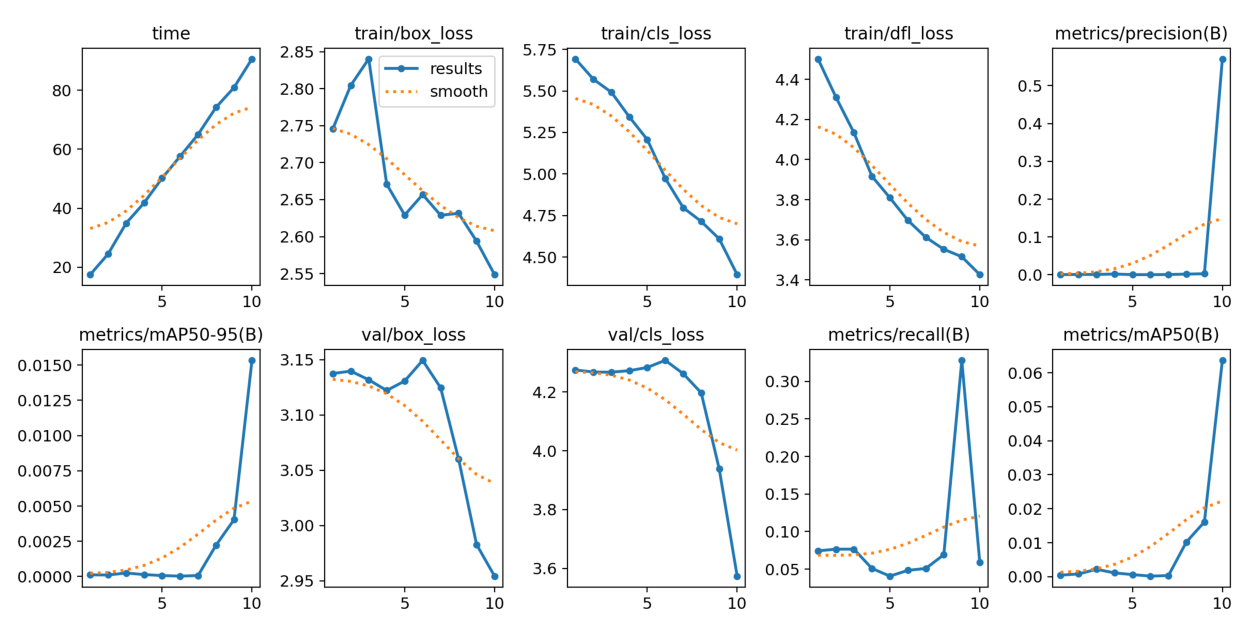

In [ ]:
resultados_grafico = cv2.imread(os.path.join(dir_resultado, 'results.png'))
mostrar(resultados_grafico)

In [ ]:
dir_resultado_val = 'runs/detect/yolov8s_modelo_eval'

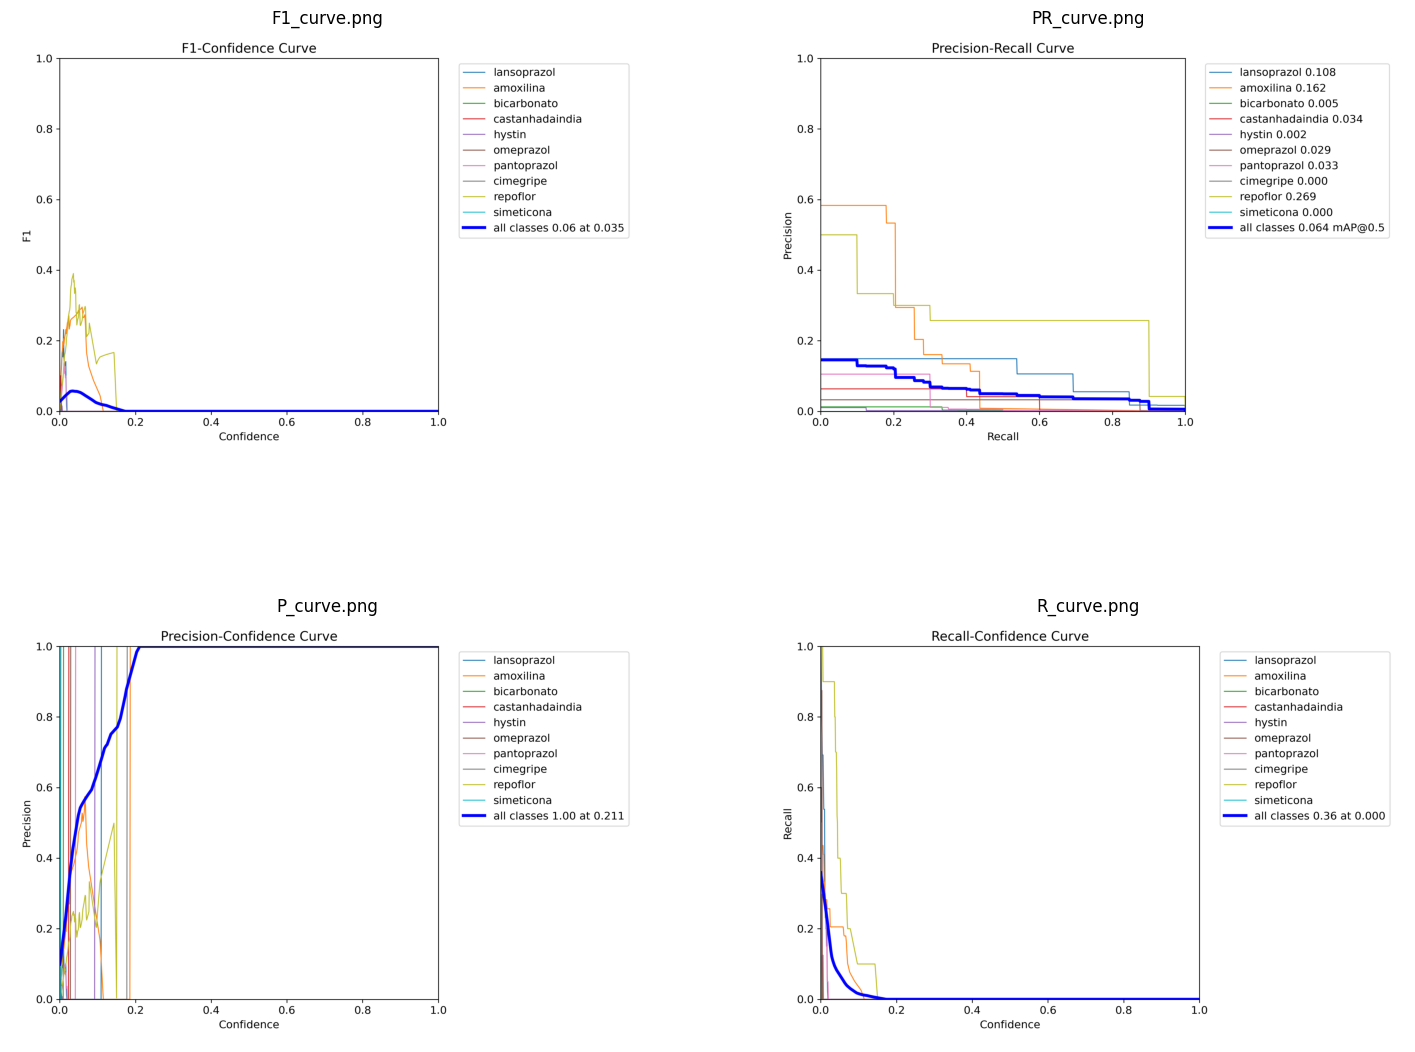

In [ ]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18,14))
for i, img in enumerate(imgs):
  #print(i, img)
  grafico = cv2.imread(os.path.join(dir_resultado_val, img))
  #print(grafico)
  grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i + 1)
  plt.title(imgs[i])
  plt.imshow(grafico)
  plt.axis('off')
plt.show()

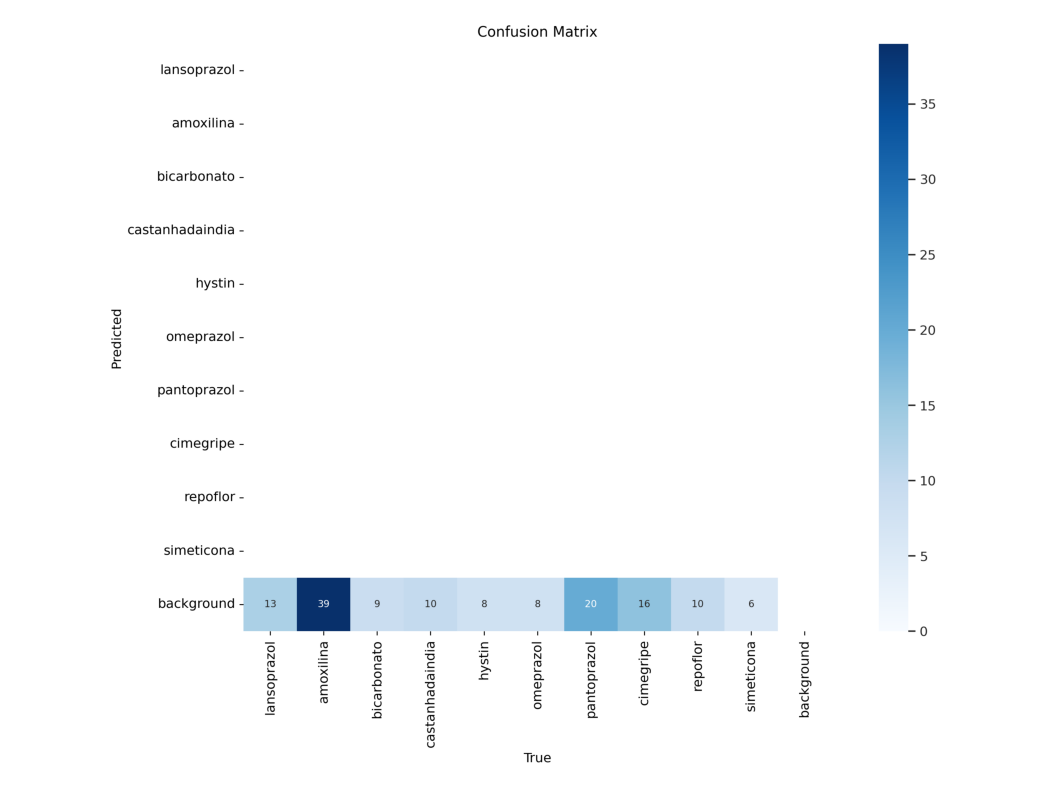

In [ ]:
matriz_confusao = cv2.imread(os.path.join(dir_resultado_val, 'confusion_matrix.png'))
mostrar(matriz_confusao)

## Testando o modelo treinado


In [ ]:
!mkdir imagens_teste

In [ ]:
!yolo task=detect mode=predict model={dir_resultado}/weights/best.pt source='/content/imagens_teste' save=true conf=0.05

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs

image 1/2 /content/imagens_teste/cimegripe.jpg: 480x640 2 amoxilinas, 40.4ms
image 2/2 /content/imagens_teste/prazi_repoflor_omeprozol.JPG: 416x640 1 repoflor, 37.4ms
Speed: 3.0ms preprocess, 38.9ms inference, 307.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


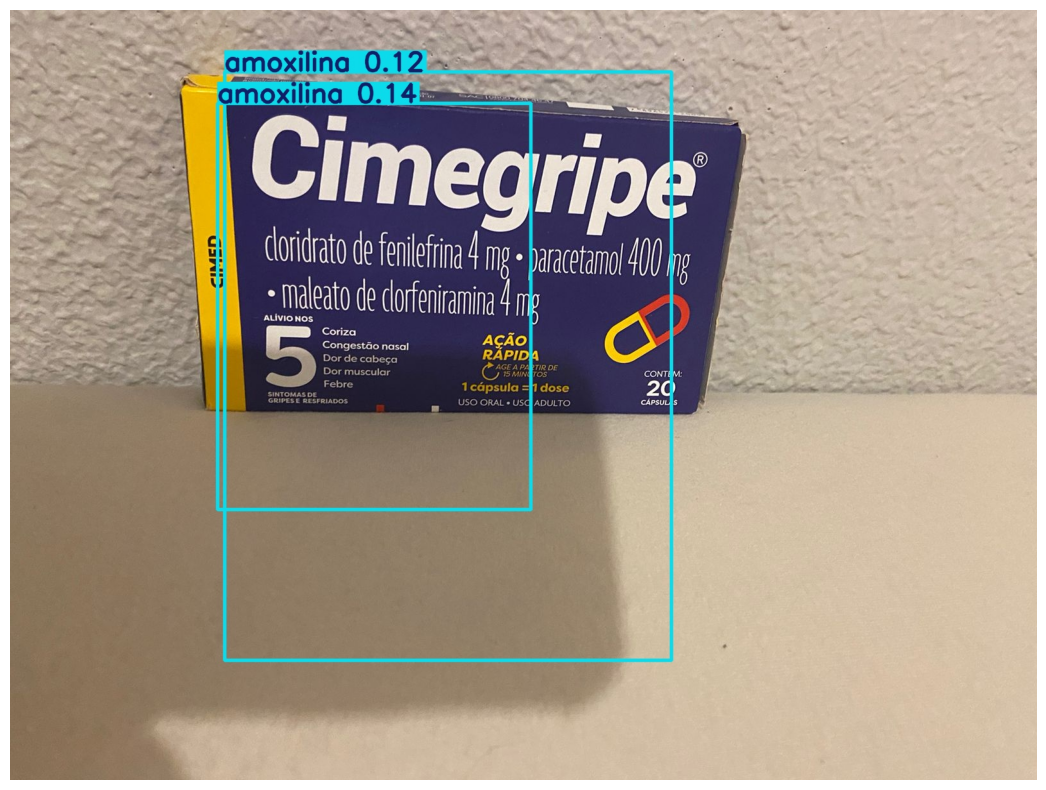

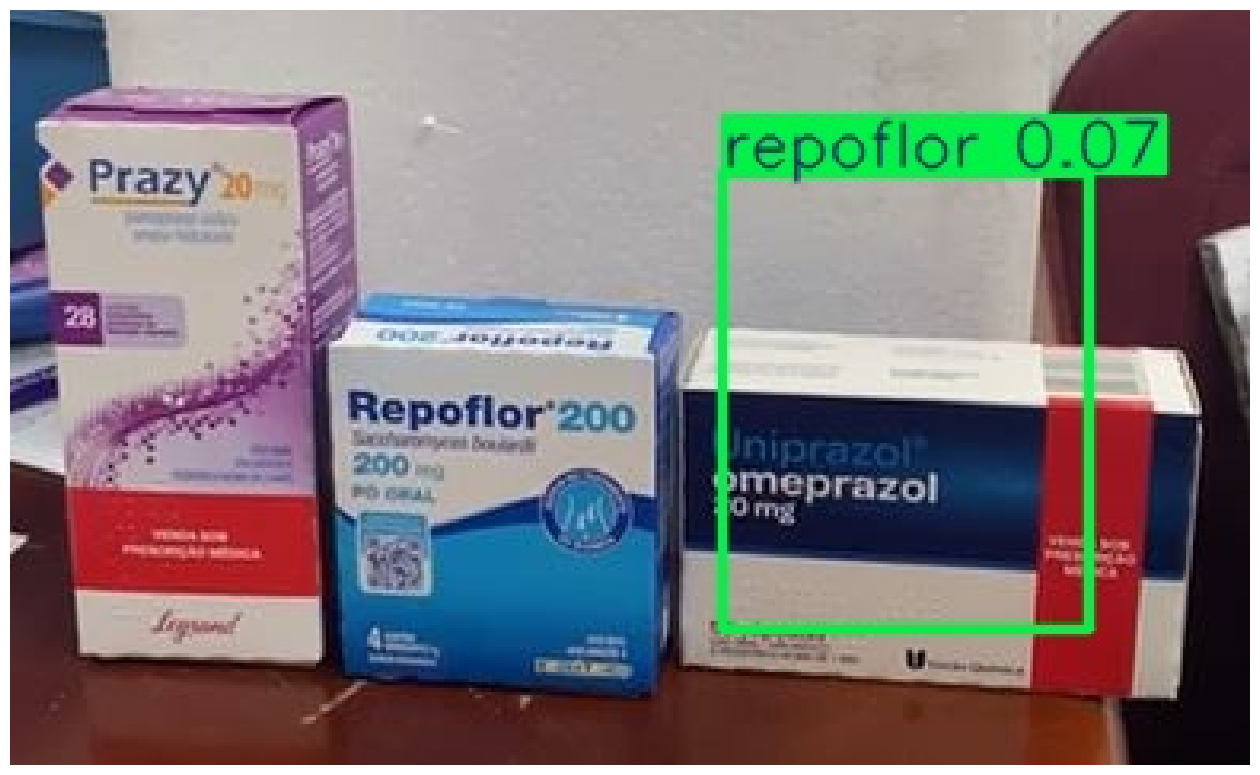

In [ ]:
dir_predicoes = 'runs/detect/predict2/'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
#print(caminhos)
for caminho_imagem in caminhos:
  imagem = cv2.imread(caminho_imagem)
  mostrar(imagem)

## Continuar treinamento



In [ ]:
!yolo task=detect mode=train model={dir_resultado}/weights/last.pt data={arquivo_config} epochs=10

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/yolov8s_modelo3/weights/last.pt, data=/content/configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
!yolo task=detect mode=val model={dir_resultado}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs
val: Scanning /content/dataset/valid... 90 images, 1 backgrounds, 0 corrupt: 100% 91/91 [00:00<00:00, 1498.78it/s]
val: New cache created: /content/dataset/valid.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.35it/s]
                   all         91        123      0.625     0.0803      0.118     0.0444
           lansoprazol         13         13          0          0      0.108     0.0443
             amoxilina          9         29      0.193      0.103     0.0393      0.018
           bicarbonato          7          9          1          0    0.00531    0.00106
       castanhadaindia          9         10          1          0     0.0339    0.00339
                hystin          8          8          0          0    0.00223   0.000442
        

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='imagens_teste' save=true

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs

image 1/2 /content/imagens_teste/cimegripe.jpg: 480x640 1 cimegripe, 50.3ms
image 2/2 /content/imagens_teste/prazi_repoflor_omeprozol.JPG: 416x640 1 omeprazol, 38.7ms
Speed: 3.0ms preprocess, 44.5ms inference, 266.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


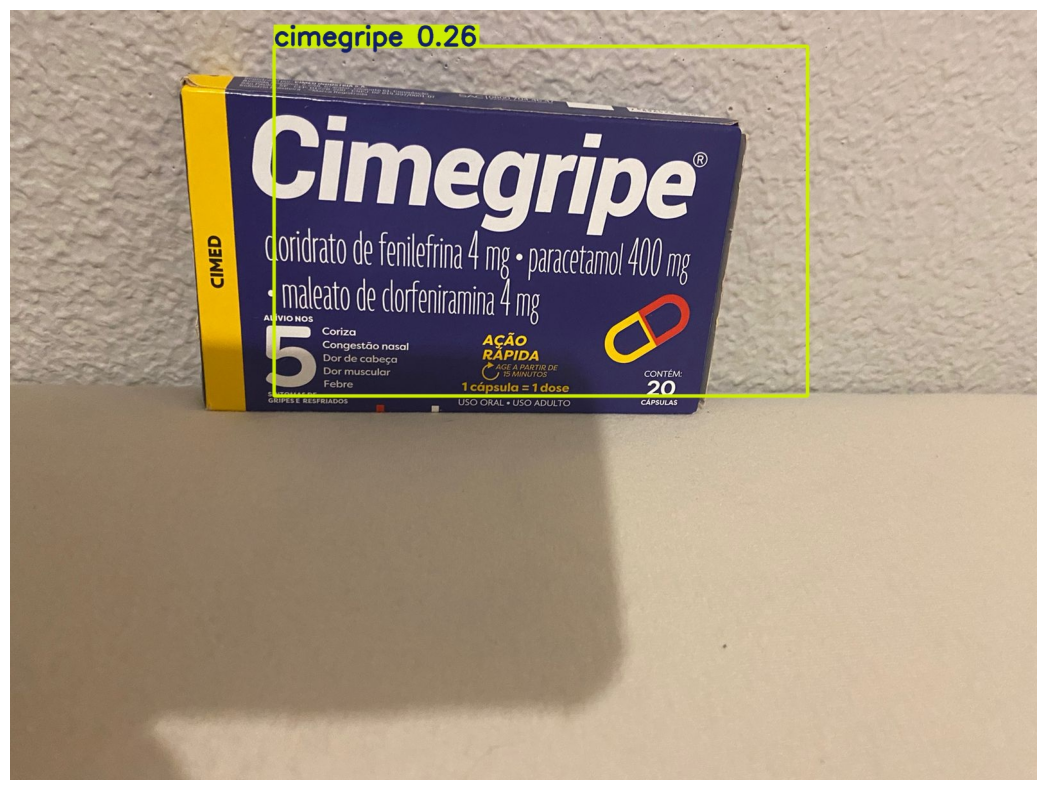

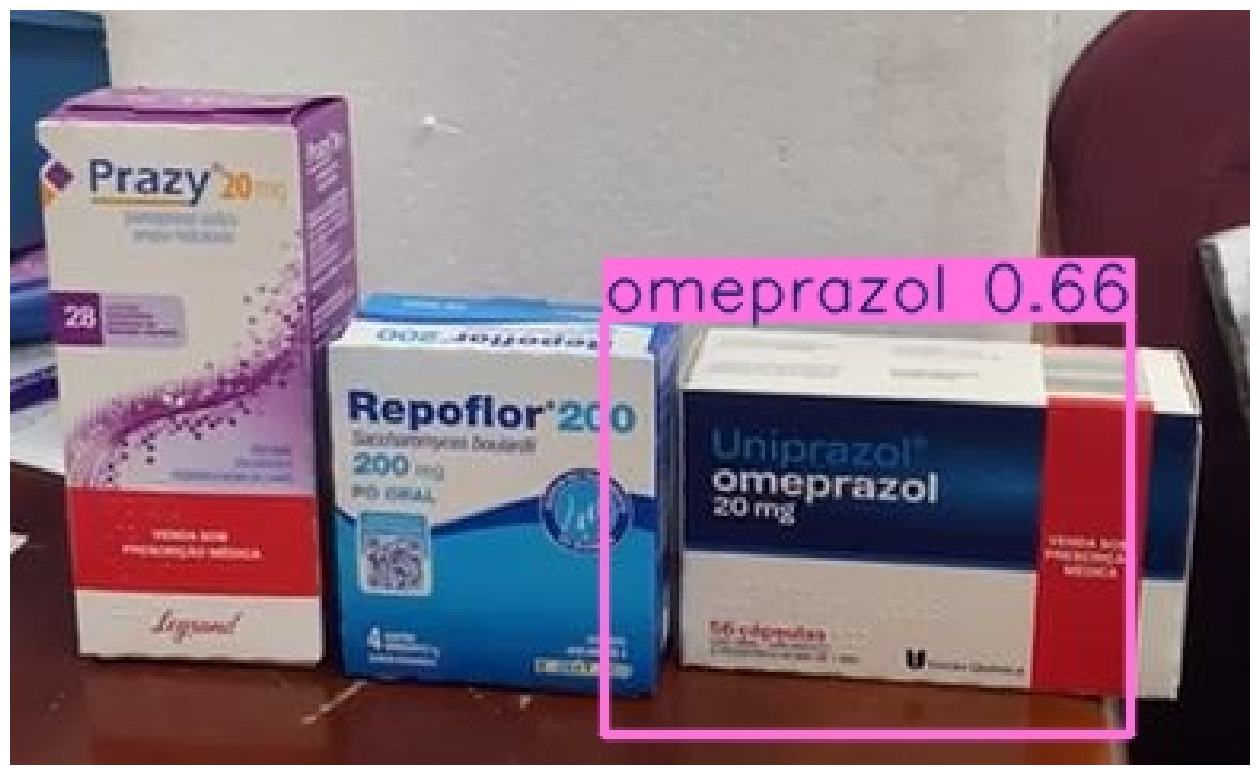

In [ ]:
dir_predicoes = 'runs/detect/predict3/'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
#print(caminhos)
for caminho_imagem in caminhos:
  imagem = cv2.imread(caminho_imagem)
  mostrar(imagem)

## Enviar para o Google Drive

In [ ]:
!cp -R {dir_resultado} /content/gdrive/MyDrive/TreinamentoCustomizadoYOLOV8/

## Exportar para outros formatos

In [ ]:
os.path.join(dir_resultado, 'weights', 'best.pt')

'/content/runs/detect/yolov8s_modelo3/weights/best.pt'

In [ ]:
model_treinado = YOLO(os.path.join(dir_resultado, 'weights', 'best.pt'))
model_treinado.export(format='onnx')

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8s summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs

PyTorch: starting from '/content/runs/detect/yolov8s_modelo3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (19.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 202.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 249.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 242.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 224.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu']
requirements: ⚠️ Rest

'/content/runs/detect/yolov8s_modelo3/weights/best.onnx'

Confira a tabela com os formatos aceitos e qual o valor do parâmetro deve ser usado para salvar no formato específico

| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |





#Continuar treinamento - 100 ÉPOCAS